In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Langkah 1: Persiapan Data (Load & Clean)

In [6]:
# Load data
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Membersihkan Data 'TotalCharges'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Mengisi data kosong (NaN) dengan angka 0
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Membuang kolom yang tidak perlu untuk prediksi
# customerID tidak ada hubungannya dengan pola churn
df.drop(['customerID'], axis=1, inplace=True)

# Mengubah target 'Churn' dari Yes/No menjadi angka 1/0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Langkah 2: Preprocessing (Mengubah Teks jadi Angka)

In [8]:
# Mengubah semua kolom kategori menjadi angka (One-Hot Encoding)
df_clean = pd.get_dummies(df)

print("Jumlah kolom setelah encoding:", df_clean.shape[1])

Jumlah kolom setelah encoding: 46


Langkah 3: Membagi Data (Split) (Training dan Testing)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# X adalah fitur (semua kolom KECUALI Churn)
# y adalah target (hanya kolom Churn)
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

# Bagi data: 80% untuk latihan, 20% untuk tes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data tes:", len(X_test))

Jumlah data latih: 5634
Jumlah data tes: 1409


Langkah 4: Melatih Model (Modeling)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Membuat model Random Forest
model = RandomForestClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

# Memprediksi data tes
y_pred = model.predict(X_test)

print("Pelatihan selesai!")

Pelatihan selesai!


Langkah 5: Evaluasi & Cara Membaca Hasil

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Akurasi Model: 0.794889992902768


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



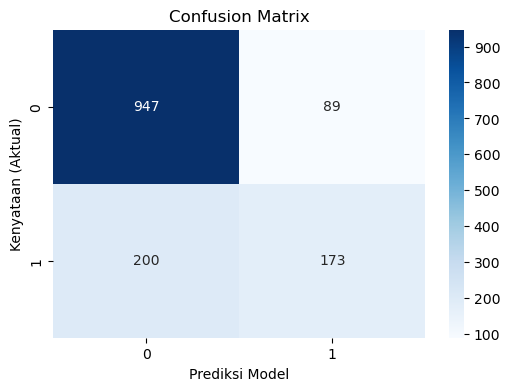

In [14]:
# Menampilkan Akurasi Sederhana
print("Akurasi Model:", accuracy_score(y_test, y_pred))
print("\n")

# Menampilkan Laporan Lengkap
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.show()

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Jumlah data training asli (Churn): 1496
Jumlah data training setelah SMOTE (Churn): 4138
Sekarang perbandingan kelasnya 50:50!
------------------------------
Classification Report (Setelah SMOTE):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.50      0.55       373

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



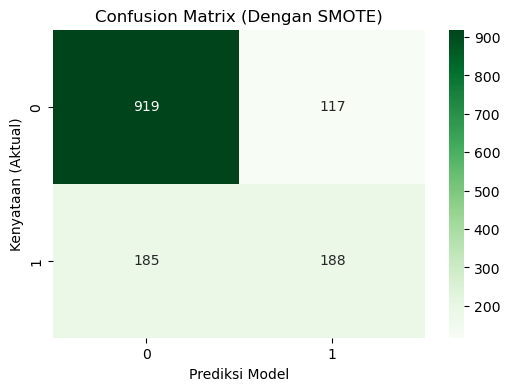

In [18]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE HANYA pada data training
# X_train_smote dan y_train_smote adalah data yang sudah diperbanyak
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek jumlah data sebelum dan sesudah
print("Jumlah data training asli (Churn):", sum(y_train == 1))
print("Jumlah data training setelah SMOTE (Churn):", sum(y_train_smote == 1))
print("Sekarang perbandingan kelasnya 50:50!")
print("-" * 30)

# Latih Model Random Forest dengan data baru (Balanced)
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Prediksi ke Data Test (Ingat: Data Test ASLI, jangan di-SMOTE)
y_pred_smote = model_smote.predict(X_test)

# Evaluasi Hasilnya
print("Classification Report (Setelah SMOTE):")
print(classification_report(y_test, y_pred_smote))

# Tampilkan Confusion Matrix Baru
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_smote), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Dengan SMOTE)')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.show()

Tuning Hyperparameter

Classification Report (Model Tuned):
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1036
           1       0.61      0.68      0.64       373

    accuracy                           0.80      1409
   macro avg       0.75      0.76      0.75      1409
weighted avg       0.81      0.80      0.80      1409



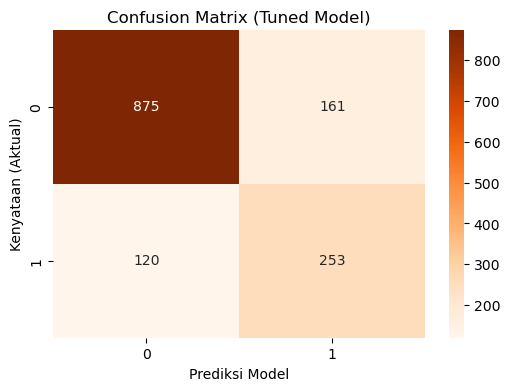

In [19]:
# Definisi Model dengan Parameter Baru (Tuning)
# Ganti model standar tadi dengan yang sudah diatur
model_tuned = RandomForestClassifier(
    n_estimators=200,    # Menambah jumlah "pohon" keputusan agar lebih teliti
    max_depth=10,        # Membatasi kedalaman pohon agar tidak menghapal data (mencegah overfitting)
    random_state=42
)

# Latih Model menggunakan data hasil SMOTE
model_tuned.fit(X_train_smote, y_train_smote)

# Prediksi ke Data Test (Data asli)
y_pred_tuned = model_tuned.predict(X_test)

# Evaluasi Hasil Tuning
print("Classification Report (Model Tuned):")
print(classification_report(y_test, y_pred_tuned))

# Tampilkan Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.show()